# Create Feature Interactions

In [34]:
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt

In [36]:
import pandas as pd

# Load Numeric Data

In [37]:
# We have to use float for now because int cannot accept NaN
num_data = pd.read_csv('./data/numeric_features.csv', low_memory=False, dtype=float)
print num_data.columns
num_data = num_data.drop('Unnamed: 0', axis=1)
num_data['id'] = num_data['id'].astype(int).astype("category")

num_data = num_data.drop('host_total_listings_count', axis=1)

print num_data.shape
num_data.sample()

Index([u'Unnamed: 0', u'id', u'bathrooms', u'bedrooms', u'beds',
       u'cleaning_fee', u'guests_included', u'host_listings_count',
       u'host_total_listings_count', u'host_acceptance_rate',
       u'host_response_rate'],
      dtype='object')
(243721, 9)


,id,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate
122775,8908059,1.0,1.0,1.0,65.0,1.0,1.0,NaN,0.0


# Load Bool Data

In [38]:
bool_data = pd.read_csv('./data/bool_features.csv', low_memory=False, dtype=int)
print bool_data.columns

bool_data = bool_data.drop('Unnamed: 0', axis=1)
bool_data['id'] = bool_data['id'].astype(int).astype("category")

bool_data.host_has_profile_pic = bool_data.host_has_profile_pic.astype(bool)
bool_data.host_identity_verified = bool_data.host_identity_verified.astype(bool)

print bool_data.shape


Index([u'Unnamed: 0', u'id', u'host_has_profile_pic',
       u'host_identity_verified'],
      dtype='object')
(243721, 3)


# Load Date Data

In [39]:
parse_dates = ['host_since', 'last_scraped', 'days_delta']
date_data = pd.read_csv('./data/date_features.csv', low_memory=False, parse_dates=parse_dates)
print date_data.columns


date_data = date_data.drop('Unnamed: 0', axis=1)
date_data['id'] = date_data['id'].astype(int).astype("category")
date_data.days_delta = date_data.days_delta.apply(lambda x: x.split(' ')[0]).astype(float)

print date_data.shape
date_data.sample()

Index([u'Unnamed: 0', u'id', u'host_since', u'last_scraped', u'days_delta'], dtype='object')
(243721, 4)


,id,host_since,last_scraped,days_delta
171446,13275870,2012-06-13,2016-10-01,1571.0


# Load Reviews Data (Dependent variable)

In [40]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
print reviews_data.columns

reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")
print reviews_data.shape
reviews_data.sample()

Index([u'Unnamed: 0', u'id', u'number_of_reviews', u'review_scores_rating',
       u'review_scores_value', u'reviews_per_month'],
      dtype='object')
(243721, 5)


,id,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month
56244,15554000,8.0,92.0,10.0,1.86


In [41]:
# Generate random indexes for our sample
import numpy as np

np.random.seed(1234)
sample_size=20000
idxs = np.random.randint(0, num_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 205819, 185192,  43586])

# Select Dependent Variable

Also, let's drop missing values from our dependent variable.
And let's drop the Id column.

In [42]:
# Set the dependent variable 
dependent_variable = 'review_scores_rating'

# Select the independent variables and get a combined dataset
data = pd.concat([num_data.loc[idxs], 
                  bool_data.loc[idxs][['host_has_profile_pic', 'host_identity_verified']], 
                  date_data.loc[idxs][['days_delta']], 
                  reviews_data.loc[idxs][['reviews_per_month', dependent_variable]]], axis=1)

# Drop Id column for now
data = data.drop('id', axis=1)

print data.shape
print data.columns

# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])


data.sample(1)

(20000, 13)
Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')


,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,days_delta,reviews_per_month,review_scores_rating
185582,1.0,1.0,1.0,NaN,1.0,1.0,0.86,1.0,True,True,450.0,2.56,85.0


# Histogram of each dependent variable

bathrooms


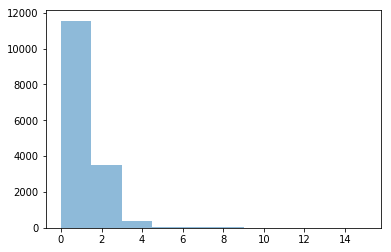

bedrooms


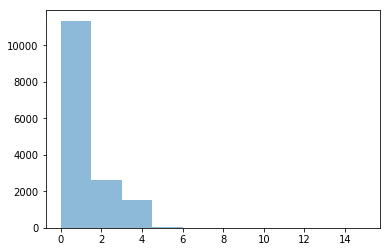

beds


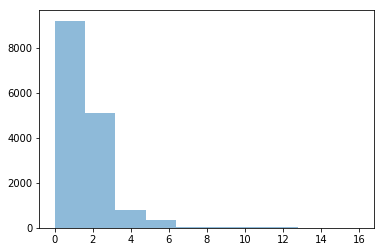

cleaning_fee


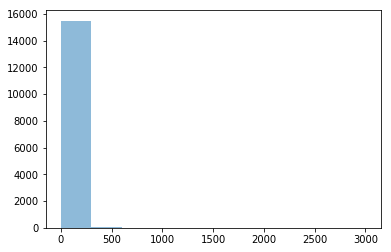

guests_included


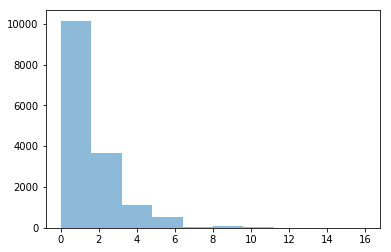

host_listings_count


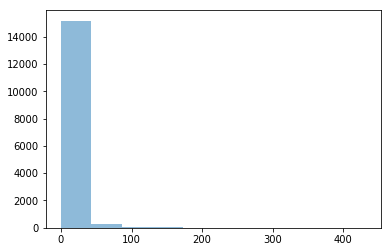

host_acceptance_rate


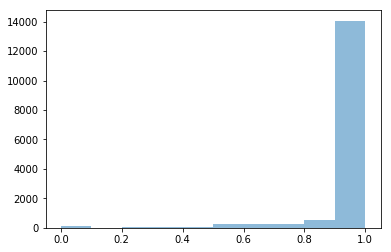

host_response_rate


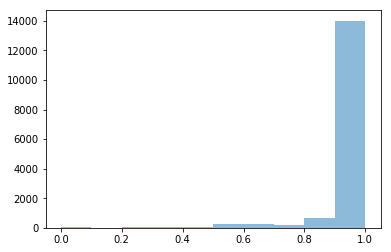

host_has_profile_pic


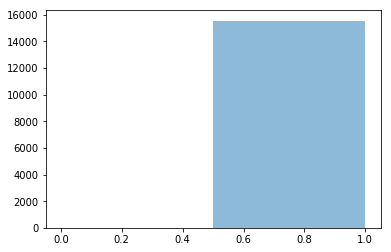

host_identity_verified


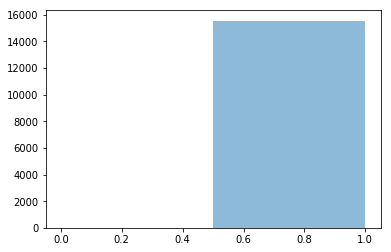

days_delta


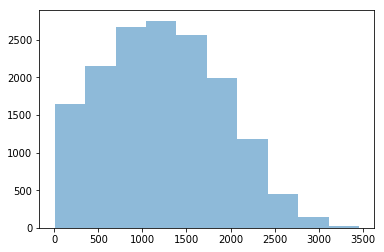

reviews_per_month


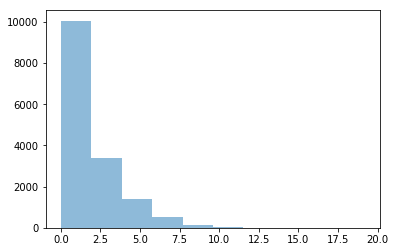

review_scores_rating


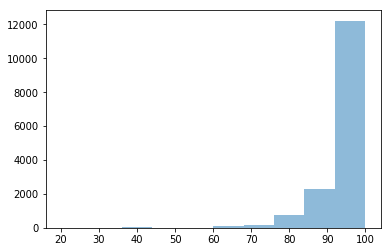

In [43]:
import matplotlib.pyplot as plt
for c in data.columns:
    if 'id' != c:
        print c
        lst = list(data[c].fillna(data[c].median()))
        
        b = 10
        if data[c].dtype == 'bool':
            b = 2
        plt.hist(lst, bins=b, alpha=0.5)
        plt.show()

(array([  456.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 15110.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

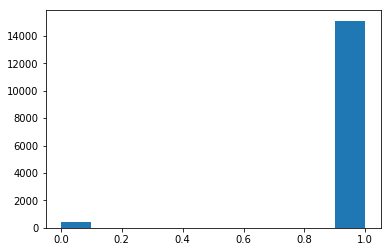

In [44]:
plt.hist(data['host_listings_count'] < 100)

# Scatter plot independent variable by each dependent variable

# Takeaways
1. Remove 'bathrooms' >= 5
2. Remove 'bedrooms' > 5
3. Remove 'beds' >= 8
4. Remove 'cleaning_fee' >= 400
5. Remove 'guests_included' > 8
6. Remove 'host_listings_count' > 100
7. Remove 'host_acceptance_rate' == 0.
8. Remove 'host_response_rate' == 0.
9. Remove 'reviews_per_month' > 12.
10. Drop 'host_has_profile_pic'
11. Drop 'host_identity_verified'

# Split data into Train and Test sets

Before preprocessing data, we need split it into Train and Test sets. Once split, we will impute missing values using Median. And finally, we will drop the outliers as mentioned in the Takeaways section. This sequence is important because we have a ton of missing values, and we'd be left with a tiny dataset if we dropped outliers before imputing missing values.

In [103]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(data, test_size=0.33, random_state=1234)

print Train.shape
print Test.shape

(10429, 13)
(5137, 13)


# Impute missing values for Train and Test sets
We will use Median for imputing missing values because it is not as affected by outliers as the Mean.
We will train the Imputer on the training data, and use this to fill the values for both Train and Test sets. 
We will not train a new Imputer on test data. This is important because we do not want to look at the test data when imputing the values.

In [104]:
# Impute missing values using median for both independent and dependent variables
# We don't care for host_has_profile_pic, and host_identity_verified.
# We dropped missing values from our dependent variable earlier, 
# so it won't be affected by imputation here.

import numpy as np
from sklearn.preprocessing import Imputer

# We need the 
train_colnames = Train.columns
print train_colnames

# Train data first
# axis 0 means impute along columns
train_imp = Imputer(missing_values=np.nan, strategy='median', axis=0, copy=True)
train_imp.fit(Train)
Train = train_imp.transform(Train)


# Then Test data
test_colnames = Test.columns
print test_colnames
Test = train_imp.transform(Test)

print Train.shape
print Test.shape

Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')
Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified', u'days_delta',
       u'reviews_per_month', u'review_scores_rating'],
      dtype='object')
(10429, 13)
(5137, 13)


# Handle Outliers
Drop them from Training data, as discussed in the Takeaways section.

In [105]:
# We need DataFrames here because we're lazy
Train = pd.DataFrame(Train, columns=train_colnames)
Train.sample()
Test = pd.DataFrame(Test, columns=test_colnames)
Test.sample()

def drop_outliers(t):
    # Drop outliers from dependent variable
    h = 0
    if 'review_scores_value' == dependent_variable:
        h = 3
    elif 'review_scores_rating' == dependent_variable:
        h = 80
    t = t.loc[t[dependent_variable] >= h]
    
    # Remove reviews_per_month == 0
    t = t.loc[t.reviews_per_month > 0].astype(float)

    # 1. Remove 'bathrooms' >= 5, convert to int
    t = t.loc[t.bathrooms < 5]
    t.bathrooms = t.bathrooms.astype(int)

    # 2. Remove 'bedrooms' > 5, convert to int
    t = t.loc[t.bedrooms <= 5]
    t.bedrooms = t.bedrooms.astype(int)

    # 3. Remove 'beds' >= 8, convert to int
    t = t.loc[t.beds < 8]
    t.beds = t.beds.astype(int)

    # 4. Remove 'cleaning_fee' > 400
    t = t.loc[t.cleaning_fee <= 400]

    # 5. Remove 'guests_included' > 8
    t = t.loc[t.guests_included <= 8]
    t = t.loc[t.guests_included > 0]
    t.guests_included = t.guests_included.astype(int)

    # 6. Remove 'host_listings_count' > 100
    t = t.loc[t.host_listings_count <= 100]
    # Remove'host_listings_count' <= 0
    t = t.loc[t.host_listings_count > 0]
    t.host_listings_count = t.host_listings_count.astype(int)
    
    

    # 7. Remove 'host_acceptance_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 8. Remove 'host_response_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 9. Remove 'reviews_per_month' > 12.
    t = t.loc[t.reviews_per_month <= 12]

    # 10. Drop 'host_has_profile_pic'
    t = t.drop('host_has_profile_pic', axis=1)

    # 11. Drop 'host_identity_verified'
    t = t.drop('host_identity_verified', axis=1)
    
    return t

Train = drop_outliers(Train)
# For Test, we will only drop the unneeded columns
# Test = Test.drop(['host_has_profile_pic', 'host_identity_verified'], axis=1)

Test = drop_outliers(Test)

print Train.shape
print Test.shape

(9791, 11)
(4841, 11)


# Create feature interactions

1. bathrooms x bedrooms
2. bedrooms x beds
3. beds x guests_included
4. bathrooms x guests_included
5. host_acceptance_rate x host_response_rate


In [106]:
def create_interaction(f1, f2, intyp):
    if 'D' == intype:
        return f1 / f2
    if 'A' == intype:
        return f1 + f2
    if 'S' == intype:
        return f1 - f2
    
    # Mulitply the features by default
    return f1 * f2

def get_interacted_dataset(ds, interactions_dict, drop=False):
    for k, v in interactions_dict.items():
        ds[k+'_by_'+v[0]] = ds[k] * ds[v[0]]
        
    if drop:
        for k in interactions_dict.keys():
            ds = ds.drop(k, axis=1)
    
    return ds


inter_dct = {
    'bedrooms': ('bathrooms', 'M'), 
    'bedrooms': ('beds', 'M'), 
    'beds': ('guests_included', 'M'), 
    'bathrooms': ('guests_included', 'M'), 
    'cleaning_fee': ('guests_included', 'D'), 
    'host_acceptance_rate': ('host_response_rate', 'D')
}

Train = get_interacted_dataset(Train, inter_dct, drop=True)
Test = get_interacted_dataset(Test, inter_dct, drop=True)

# Square the reviews_per_month after adding 1 to each observation

In [49]:
# Train['reviews_per_month'] = (Train['reviews_per_month'] + 1)**2
# Test['reviews_per_month'] = (Test['reviews_per_month'] + 1)**2

In [107]:
new_dep_var = dependent_variable

# Interact Dependent Variable with 'reviews_per_month'

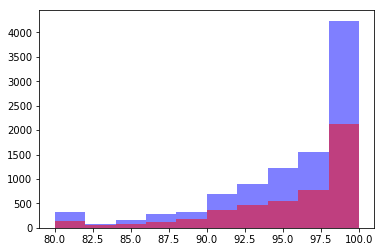

In [108]:
plt.hist(Train[new_dep_var], alpha=0.5, color='b')
plt.hist(Test[new_dep_var], alpha=0.5, color='r')
plt.show()

# Separate the Dependent and Independet Variables

In [109]:
# Train data
y_train = Train[new_dep_var].values
print y_train.shape

X_train = Train.drop([dependent_variable, new_dep_var], axis=1)
print X_train.shape

# Test data
y_test = Test[new_dep_var].values
print y_test.shape

X_test = Test.drop([dependent_variable, new_dep_var], axis=1)
print X_test.shape

(9791,)
(9791, 10)
(4841,)
(4841, 10)


In [110]:
for c in sorted(X_train.columns):
    print c

bathrooms_by_guests_included
bedrooms_by_beds
beds_by_guests_included
cleaning_fee_by_guests_included
days_delta
guests_included
host_acceptance_rate_by_host_response_rate
host_listings_count
host_response_rate
reviews_per_month


# Normalize the Training and Test Data

In [111]:
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

# X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

X_train = normalize_df(X_train)
X_test = normalize_df(X_test)

# Scale the Dependent variables
We don't want any one variable dominating others in the regression model, so let's start by scaling the dependent variables. As with Imputation, we will train the scaler only on the training data (to learn the mean and standard deviation), and then use it as-is on the Test data. We will assume that all dependent variables are interval.

In [112]:
# Scale the data

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

0: 9.999999977795539e-08, 9.999999977795539e-08


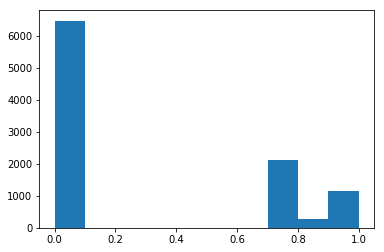

1: 9.999999977795539e-08, 9.999999977795539e-08


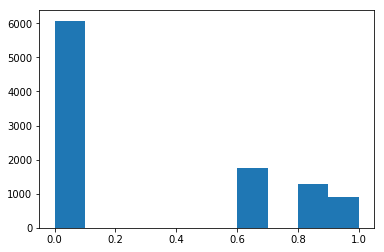

2: 9.999999977795539e-08, 9.999999977795539e-08


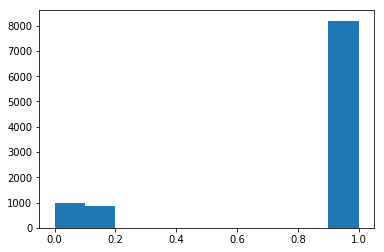

3: 9.999999977795539e-08, 9.999999977795539e-08


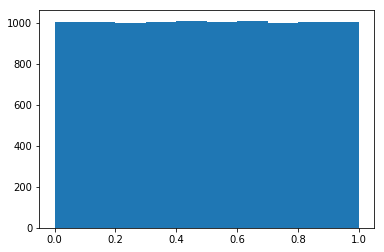

4: 9.999999977795539e-08, 9.999999977795539e-08


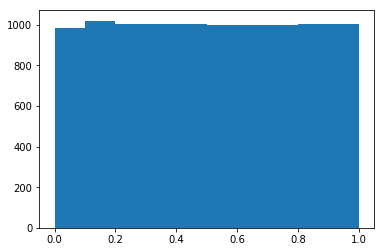

5: 9.999999977795539e-08, 9.999999977795539e-08


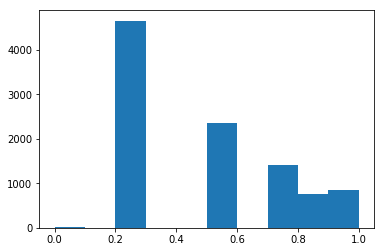

6: 9.999999977795539e-08, 9.999999977795539e-08


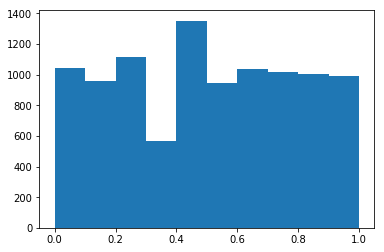

7: 9.999999977795539e-08, 9.999999977795539e-08


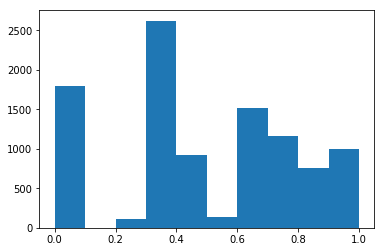

8: 9.999999977795539e-08, 9.999999977795539e-08


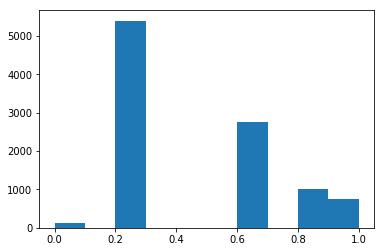

9: 9.999999977795539e-08, 9.999999977795539e-08


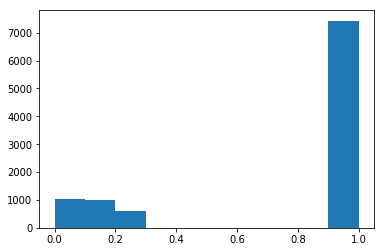

In [98]:
import matplotlib.pyplot as plt
for i in range(X_train.shape[1]):
    print '%s: %s, %s' % (i, np.min(X_train[:, i]), np.min(X_train[:, i]))
    plt.hist(X_train[:, i])
    plt.show()

# Try some transformations on the Independent Variables

exp


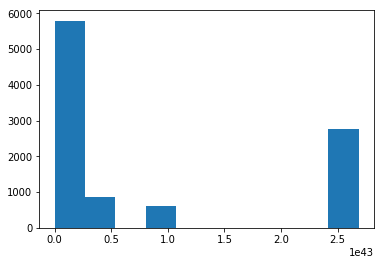

identity


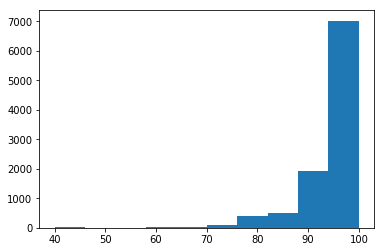

log


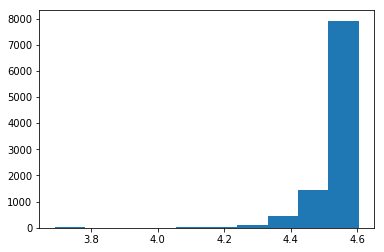

sqrt


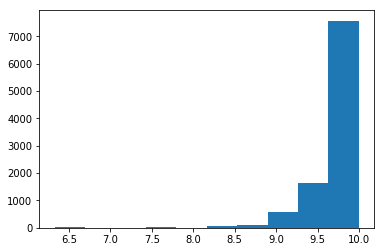

standard_scale


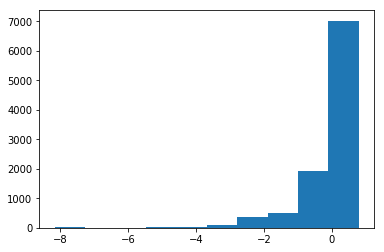

x^1/4


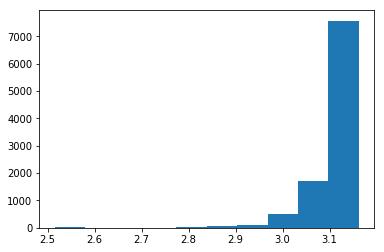

In [99]:
func_dict = {
    'identity': lambda x: x, 
    'sqrt': np.sqrt, 
    'log': np.log, 
    'exp': np.exp, 
    'x^1/4': lambda x: [i**(1./4) for i in x],
    'standard_scale': lambda x: [(i - np.mean(x)) / np.std(x) for i in x],
}

for k in sorted(func_dict.keys()):
    print k
    plt.hist(func_dict[k](y_train.ravel()))
    plt.show()


# Create a baseline model using Training Mean

Mean squared error: 24.86
Variance score: -0.00


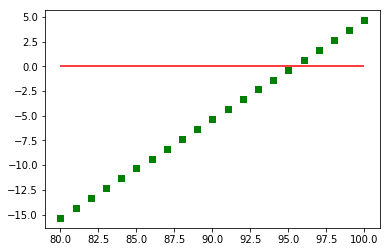

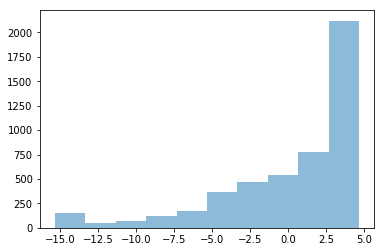

In [113]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.mean(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

plt.hist(y_test - y_test_baseline_pred, alpha=0.5)
plt.show()

# Create a baseline model using Training Median

Mean squared error: 27.44
Variance score: -0.10


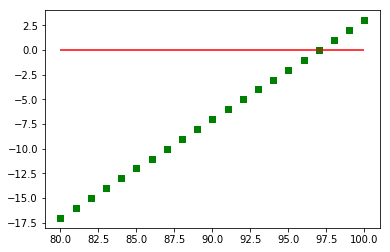

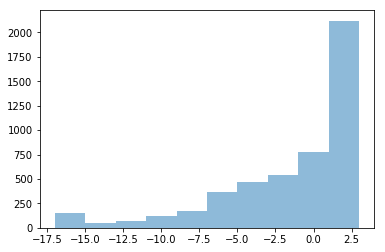

In [114]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.median(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

plt.hist(y_test - y_test_baseline_pred, alpha=0.5)
plt.show()

Mean squared error: 23.72
Variance score: 0.05
train residuals:


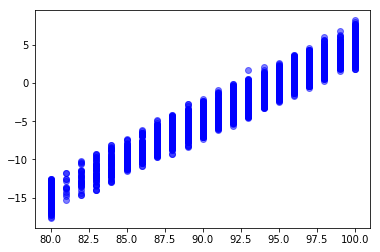

test residuals:


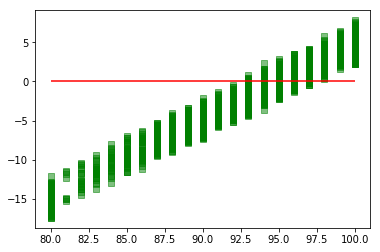

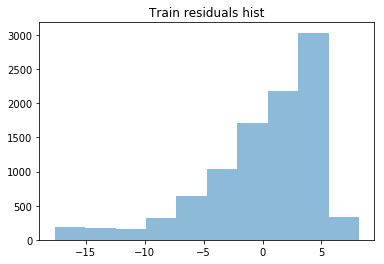

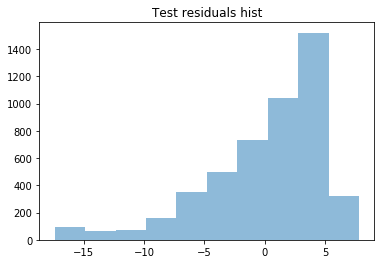

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.Lasso(alpha=0.001, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()


plt.hist(y_train - y_train_pred, alpha=0.5)
plt.title('Train residuals hist')
plt.show()

plt.hist(y_test - y_pred, alpha=0.5)
plt.title('Test residuals hist')
plt.show()

# Check for endogeneity

guests_included: correlation coef: 0.0005017322894082238


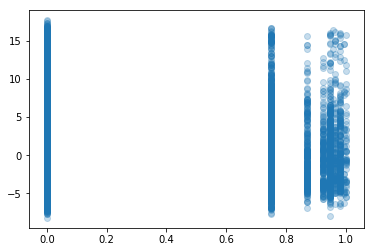

host_listings_count: correlation coef: 0.0005092260212860325


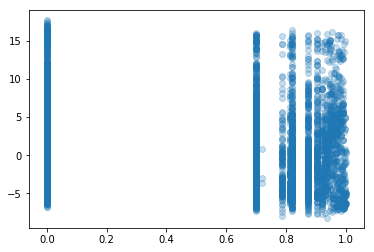

host_response_rate: correlation coef: -0.0005822170750876966


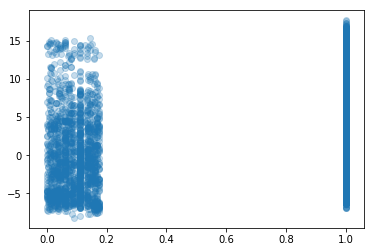

days_delta: correlation coef: -0.000704674815699753


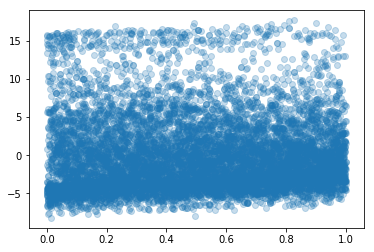

reviews_per_month: correlation coef: 0.0007035119246082208


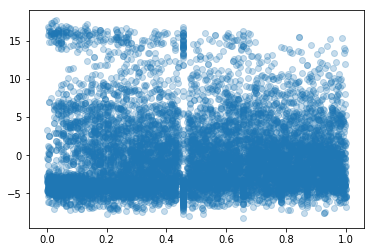

review_scores_rating: correlation coef: 0.0007436056470203918


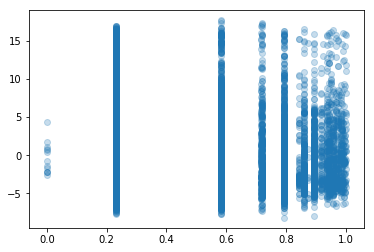

beds_by_guests_included: correlation coef: -0.0007095063401984002


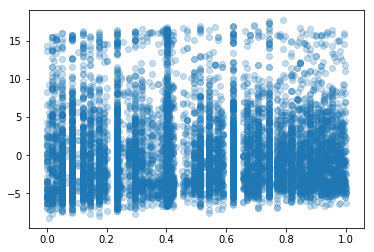

cleaning_fee_by_guests_included: correlation coef: 0.000760114017022682


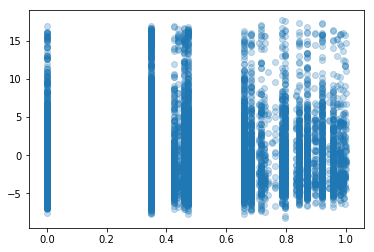

bedrooms_by_beds: correlation coef: -0.0007753702706056689


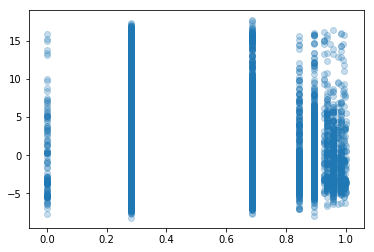

bathrooms_by_guests_included: correlation coef: -0.0005320603935455143


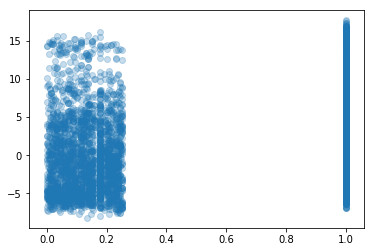

In [116]:
y_train_error = regr.predict(X_train) - y_train
for cname, c in zip(Train.columns, X_train.T):
    print '%s: correlation coef: %s' % (cname, np.corrcoef(c.ravel(), y_train_error.ravel())[1, 0])
    plt.scatter(c.ravel(), y_train_error.ravel(), alpha=0.25)
    plt.show()

In [62]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -24.2525889050534
<class 'sklearn.linear_model.ridge.Ridge'> -24.252369047205143
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -25.3348212575519
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -25.527540900902153
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> -23.190428318453947
<class 'sklearn.ensemble.forest.RandomForestRegressor'> -23.963237018198498


Mean squared error: 22.93
r2 score: 0.08
explained variance score: 0.10


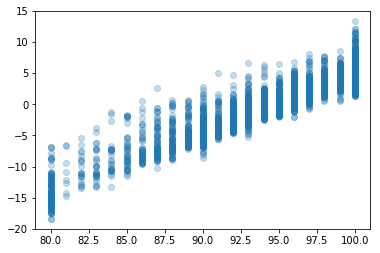

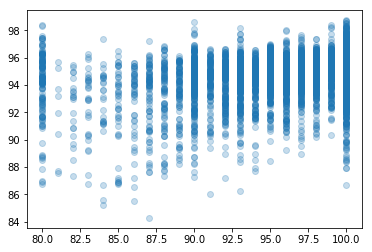

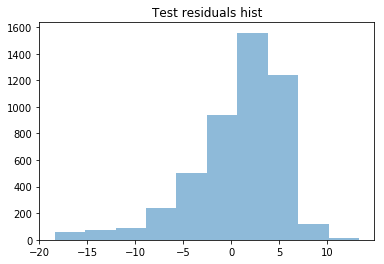

In [117]:
import xgboost
from sklearn.metrics import explained_variance_score

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, 
                          subsample=0.5, colsample_bytree=0.5, max_depth=15, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

plt.hist(y_test - y_pred, alpha=0.5)
plt.title('Test residuals hist')
plt.show()

Mean squared error: 22.37
r2 score: 0.10
explained variance score: 0.10


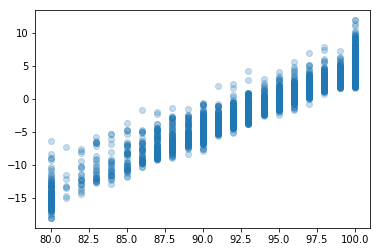

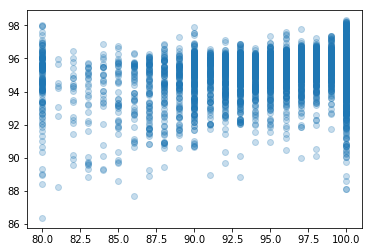

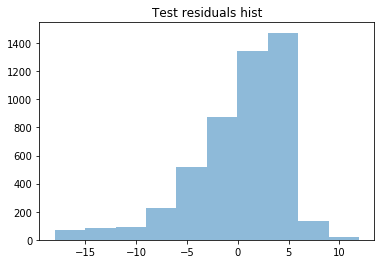

In [118]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, subsample=0.75, max_depth=15)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

plt.hist(y_test - y_pred, alpha=0.5)
plt.title('Test residuals hist')
plt.show()

# Use AdaBoost with DecisionTreesRegressor

Mean squared error: 22.04
r2 score: 0.11
explained variance score: 0.12


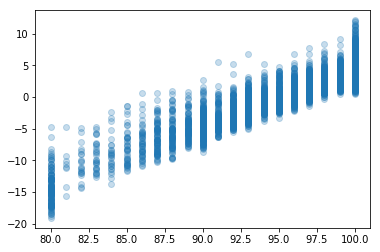

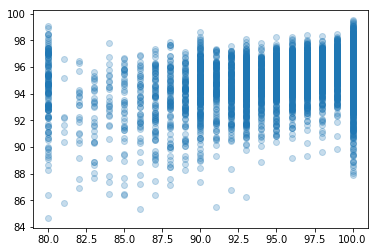

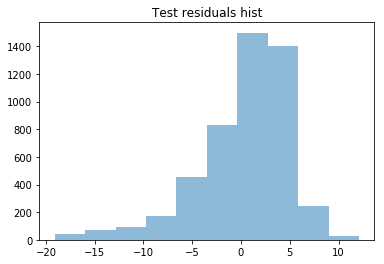

In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


dt = DecisionTreeRegressor(max_depth=50, min_impurity_decrease=0.25)

ab = AdaBoostRegressor(randf, n_estimators=50, learning_rate=0.01)

ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()


plt.hist(y_test - y_pred, alpha=0.5)
plt.title('Test residuals hist')
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
mse: 23.721740199032194
r2: 0.04553601724329803


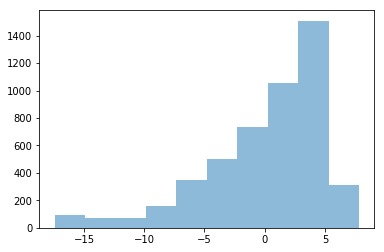

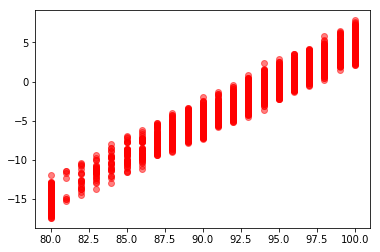

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=1234, tol=0.1, verbose=False)
mse: 32.00400988954284
r2: -0.2877080048538849


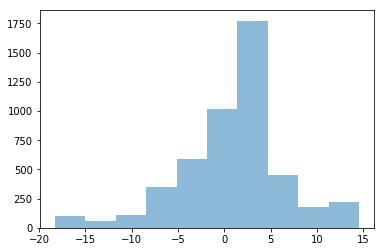

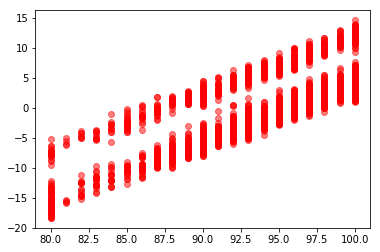

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=1234, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)
mse: 33.15788443367551
r2: -0.33413510858885354


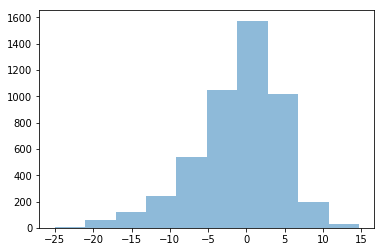

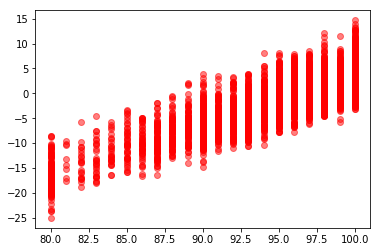

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
mse: 24.674938764920828
r2: 0.007183278703772111


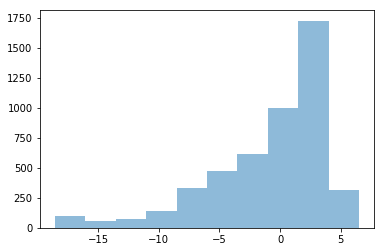

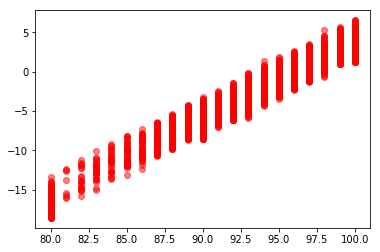

In [162]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=1234, tol=0.1)),
              ('RANSAC', RANSACRegressor(random_state=1234)),
              ('HuberRegressor', HuberRegressor())]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3


for name, estimator in estimators:
    # model = make_pipeline(PolynomialFeatures(3), estimator)
    
    model = estimator
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print model
    ms_err = mean_squared_error(y_test, y_pred)
    print 'mse: %s' % ms_err
    print 'r2: %s' % r2_score(y_test, y_pred)
    plt.hist(y_test - y_pred, alpha=0.5)
    plt.show()
    plt.scatter(y_test, y_test-y_pred, color='r', alpha=0.5)
    plt.show()

In [142]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'tol': [0.1, 0.5, 0.9], 
    'max_subpopulation': [1000., 2000., 5000.,], 
    'n_subsamples': [1000, 2000, 5000,]
}

ts = TheilSenRegressor(random_state=1234)

clf = GridSearchCV(ts, parameters, verbose=2, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.1 ............
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.1 ............
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.1 ............
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.1 ............


/Users/jhabib/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/jhabib/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/jhabib/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/jhabib/miniconda2/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.1, total=   1.6s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.1 ............
[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.1, total=   2.0s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.1, total=   2.3s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.1, total=   2.5s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.1, total=   2.3s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.5, total=   2.8s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=1000, tol=0.5, total=   3.4s
[CV] max_subpopulation=1000.0, n_subsamples=1000, tol=0.

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.5s


[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.1, total=   6.9s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.5, total=   6.4s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.1, total=   7.1s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.5 ............
[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.5, total=   6.6s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.9 ............
[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.5, total=   6.8s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.9 ............
[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.5, total=   6.5s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.9 ............
[CV]  max_subpopulation=1000.0, n_subsamples=5000, tol=0.5, total=   6.4s
[CV] max_subpopulation=1000.0, n_subsamples=5000, tol=0.

[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.1 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.1, total=  10.6s
[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.1 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.1, total=  10.0s
[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.1, total=   7.7s
[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.1, total=   8.0s
[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.5, total=   7.1s
[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.1, total=   7.5s
[CV] max_subpopulation=5000.0, n_subsamples=1000, tol=0.5 ............
[CV]  max_subpopulation=5000.0, n_subsamples=1000, tol=0.5,

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=-1, n_subsamples=None,
         random_state=1234, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_subpopulation': [1000.0, 2000.0, 5000.0], 'n_subsamples': [1000, 2000, 5000], 'tol': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=2000.0, n_jobs=-1, n_subsamples=1000,
         random_state=1234, tol=0.1, verbose=False)
mse: 23.718699977432948
r2: 0.045658343092570886


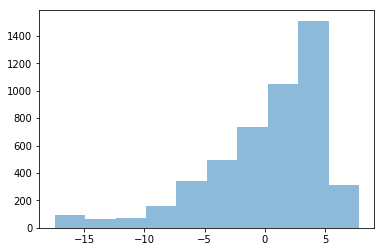

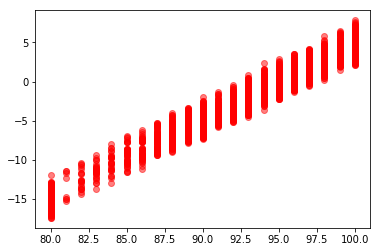

In [143]:
y_pred = clf.predict(X_test)
print clf.best_estimator_
ms_err = mean_squared_error(y_test, y_pred)
print 'mse: %s' % ms_err
print 'r2: %s' % r2_score(y_test, y_pred)
plt.hist(y_test - y_pred, alpha=0.5)
plt.show()
plt.scatter(y_test, y_test-y_pred, color='r', alpha=0.5)
plt.show()

# Grid Search over GradientBoostingRegressor

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] alpha=0.01, learning_rate=0.01, loss=ls .........................
[CV] alpha=0.01, learning_rate=0.01, loss=ls .........................
[CV] alpha=0.01, learning_rate=0.01, loss=ls .........................
[CV] alpha=0.01, learning_rate=0.01, loss=ls .........................
[CV] .......... alpha=0.01, learning_rate=0.01, loss=ls, total=   6.7s
[CV] alpha=0.01, learning_rate=0.01, loss=ls .........................
[CV] .......... alpha=0.01, learning_rate=0.01, loss=ls, total=   6.9s
[CV] alpha=0.01, learning_rate=0.01, loss=lad ........................
[CV] .......... alpha=0.01, learning_rate=0.01, loss=ls, total=   7.0s
[CV] alpha=0.01, learning_rate=0.01, loss=lad ........................
[CV] .......... alpha=0.01, learning_rate=0.01, loss=ls, total=   7.2s
[CV] alpha=0.01, learning_rate=0.01, loss=lad ........................
[CV] .......... alpha=0.01, learning_rate=0.01, loss=ls, total=   7.3s
[CV] alpha=0.01

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.7s


[CV] .......... alpha=0.01, learning_rate=0.03, loss=ls, total=   7.4s
[CV] alpha=0.01, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.01, learning_rate=0.03, loss=ls, total=   7.8s
[CV] alpha=0.01, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.01, learning_rate=0.03, loss=lad, total=   9.8s
[CV] alpha=0.01, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.01, learning_rate=0.03, loss=lad, total=  12.0s
[CV] alpha=0.01, learning_rate=0.03, loss=huber ......................
[CV] ......... alpha=0.01, learning_rate=0.03, loss=lad, total=  11.9s
[CV] alpha=0.01, learning_rate=0.03, loss=huber ......................
[CV] ....... alpha=0.01, learning_rate=0.03, loss=huber, total=   0.2s
[CV] alpha=0.01, learning_rate=0.03, loss=huber ......................
[CV] ....... alpha=0.01, learning_rate=0.03, loss=huber, total=   3.7s
[CV] alpha=0.01, learning_rate=0.03, loss=huber ......................
[CV] .

[CV] .......... alpha=0.02, learning_rate=0.03, loss=ls, total=   7.3s
[CV] alpha=0.02, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.02, learning_rate=0.03, loss=ls, total=   7.3s
[CV] alpha=0.02, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.02, learning_rate=0.03, loss=ls, total=   7.4s
[CV] alpha=0.02, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.02, learning_rate=0.03, loss=ls, total=   7.5s
[CV] alpha=0.02, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.02, learning_rate=0.03, loss=lad, total=   8.0s
[CV] alpha=0.02, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.02, learning_rate=0.03, loss=lad, total=   7.9s
[CV] alpha=0.02, learning_rate=0.03, loss=huber ......................
[CV] ......... alpha=0.02, learning_rate=0.03, loss=lad, total=   7.9s
[CV] alpha=0.02, learning_rate=0.03, loss=huber ......................
[CV] .

[CV] ....... alpha=0.03, learning_rate=0.02, loss=huber, total=   4.9s
[CV] alpha=0.03, learning_rate=0.03, loss=ls .........................
[CV] .......... alpha=0.03, learning_rate=0.03, loss=ls, total=   7.6s
[CV] alpha=0.03, learning_rate=0.03, loss=ls .........................
[CV] .......... alpha=0.03, learning_rate=0.03, loss=ls, total=   7.5s
[CV] alpha=0.03, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.03, learning_rate=0.03, loss=ls, total=   7.3s
[CV] alpha=0.03, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.03, learning_rate=0.03, loss=ls, total=   7.1s
[CV] alpha=0.03, learning_rate=0.03, loss=lad ........................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min


[CV] .......... alpha=0.03, learning_rate=0.03, loss=ls, total=   7.2s
[CV] alpha=0.03, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.03, learning_rate=0.03, loss=lad, total=   7.5s
[CV] alpha=0.03, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.03, learning_rate=0.03, loss=lad, total=   7.7s
[CV] alpha=0.03, learning_rate=0.03, loss=huber ......................
[CV] ....... alpha=0.03, learning_rate=0.03, loss=huber, total=   0.4s
[CV] alpha=0.03, learning_rate=0.03, loss=huber ......................
[CV] ......... alpha=0.03, learning_rate=0.03, loss=lad, total=   8.1s
[CV] alpha=0.03, learning_rate=0.03, loss=huber ......................
[CV] ....... alpha=0.03, learning_rate=0.03, loss=huber, total=   0.2s
[CV] alpha=0.03, learning_rate=0.03, loss=huber ......................
[CV] ....... alpha=0.03, learning_rate=0.03, loss=huber, total=   0.2s
[CV] alpha=0.03, learning_rate=0.03, loss=huber ......................
[CV] .

[CV] .......... alpha=0.04, learning_rate=0.03, loss=ls, total=   7.4s
[CV] alpha=0.04, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.04, learning_rate=0.03, loss=ls, total=   7.6s
[CV] alpha=0.04, learning_rate=0.03, loss=lad ........................
[CV] .......... alpha=0.04, learning_rate=0.03, loss=ls, total=   7.6s
[CV] alpha=0.04, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.04, learning_rate=0.03, loss=lad, total=   8.2s
[CV] alpha=0.04, learning_rate=0.03, loss=lad ........................
[CV] ......... alpha=0.04, learning_rate=0.03, loss=lad, total=   7.6s
[CV] alpha=0.04, learning_rate=0.03, loss=huber ......................
[CV] ......... alpha=0.04, learning_rate=0.03, loss=lad, total=   7.8s
[CV] alpha=0.04, learning_rate=0.03, loss=huber ......................
[CV] ....... alpha=0.04, learning_rate=0.03, loss=huber, total=   0.2s
[CV] alpha=0.04, learning_rate=0.03, loss=huber ......................
[CV] .

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.8min finished


GradientBoostingRegressor(alpha=0.01, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=18,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40, presort='auto',
             random_state=None, subsample=0.4, verbose=0, warm_start=False)
mse: 22.689755771027514
r2: 0.08705877059241485


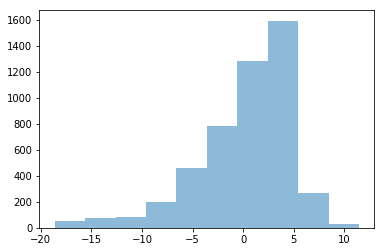

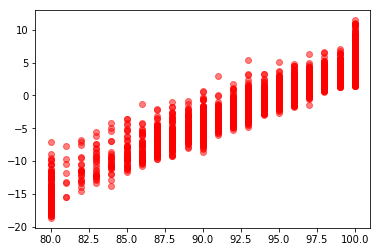

In [154]:
from sklearn.model_selection import GridSearchCV

parameters = { 
    'learning_rate': [i*0.01 for i in range(1, 5)], 
    'alpha': [i*0.01 for i in range(1, 5)], 
    'loss': ['ls', 'lad', 'huber']
}

gb = GradientBoostingRegressor(subsample=0.4, n_estimators=40, max_depth=18)
clf = GridSearchCV(gb, parameters, verbose=2, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print clf.best_estimator_
ms_err = mean_squared_error(y_test, y_pred)
print 'mse: %s' % ms_err
print 'r2: %s' % r2_score(y_test, y_pred)
plt.hist(y_test - y_pred, alpha=0.5)
plt.show()
plt.scatter(y_test, y_test-y_pred, color='r', alpha=0.5)
plt.show()

# Grid Search Done

In [156]:
print 'grid search done'
print clf.best_estimator_
print clf.best_params_

grid search done
GradientBoostingRegressor(alpha=0.01, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=18,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=40, presort='auto',
             random_state=None, subsample=0.4, verbose=0, warm_start=False)
{'alpha': 0.01, 'learning_rate': 0.03, 'loss': 'ls'}


# Stack some Models using StackingRegressor

## Create a model list first

In [65]:
lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.1, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')

## Let's try vecstack API

task:         [regression]
metric:       [rmse]
variant:      [A]
n_estimators: [5]

estimator  0: [lr: LinearRegression]
    fold  0:  [21.68335193]
    fold  1:  [26.58015300]
    fold  2:  [22.24886884]
    fold  3:  [23.68003976]
    fold  4:  [23.92535628]
    fold  5:  [24.61239560]
    fold  6:  [23.38481733]
    fold  7:  [26.26911637]
    fold  8:  [26.10860974]
    fold  9:  [23.93118071]
    ----
    MEAN:     [24.24238896] + [1.58000850]

estimator  1: [lass: Lasso]
    fold  0:  [360.37117808]
    fold  1:  [406.78131799]
    fold  2:  [365.67865188]
    fold  3:  [384.30646732]
    fold  4:  [398.20137570]
    fold  5:  [368.16290421]
    fold  6:  [382.02231828]
    fold  7:  [387.14107350]
    fold  8:  [378.82584902]
    fold  9:  [422.88291930]
    ----
    MEAN:     [385.43740553] + [18.43186790]

estimator  2: [ridge: Ridge]
    fold  0:  [21.68335141]
    fold  1:  [26.58015063]
    fold  2:  [22.24886976]
    fold  3:  [23.68003921]
    fold  4:  [23.92535512]
   

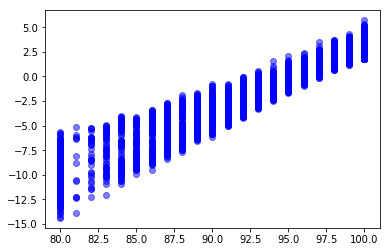

test residuals:


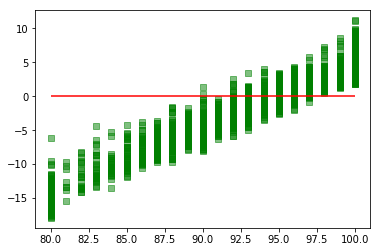

In [66]:
from vecstack import StackingTransformer
from vecstack import stacking
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

def rmse(train, pred):
    return mean_squared_error(train, pred)


def rsq(train, pred):
    return r2_score(train, pred)

lr = linear_model.LinearRegression()

lass = linear_model.Lasso(alpha=0.001, fit_intercept=False, 
                          max_iter=10000)

ridge = linear_model.Ridge(normalize=False, alpha=0.001, 
                           max_iter=10000)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, 
                               subsample=0.75, max_depth=15)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, 
                           gamma=0, subsample=0.5, colsample_bytree=0.5, 
                           max_depth=15, objective='reg:linear')

randf = RandomForestRegressor(n_estimators=100, min_samples_split=10)

svr_rbf = SVR(kernel='rbf')


estimators = [('lr', lr), 
              ('lass', lass), 
              ('ridge', ridge),
              ('gbf', GradientBoostingRegressor(alpha=0.001)), 
              # ('abr', AdaBoostRegressor(learning_rate=0.001)),
              # ('xgb', xgb), 
              ('randf', randf), 
             ]

stack = StackingTransformer(estimators, regression=True, 
                            shuffle=True, n_folds=10, 
                            metric=rmse, verbose=2, 
                           )

stack = stack.fit(X_train, y_train)

# Get stacked features
S_train = stack.transform(X_train)
S_test = stack.transform(X_test)

# Use 2nd level estimator on Stacked data
# model = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.05)
model = gb

model.fit(S_train, y_train)

y_train_pred = model.predict(S_train)

# Make predictions using the testing set
y_pred = model.predict(S_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print 'Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()) 

# Plot the residuals
print 'train residuals:'
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.show()

print 'test residuals:'
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
plt.show()

# Feature Importances

feature ranking: 
1. feature 4 (0.218258)
2. feature 3 (0.210549)
3. feature 6 (0.172101)
4. feature 7 (0.115274)
5. feature 1 (0.070845)
6. feature 5 (0.056356)
7. feature 8 (0.049145)
8. feature 9 (0.046782)
9. feature 2 (0.035211)
10. feature 0 (0.025480)


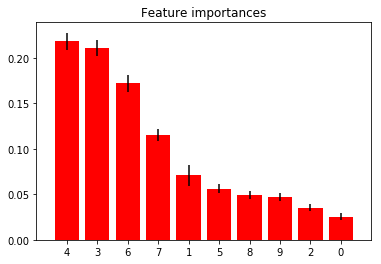

In [168]:
from sklearn.ensemble import ExtraTreesRegressor

forest = ExtraTreesRegressor(n_estimators=500, random_state=1234)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], 
             axis=0)

indices = np.argsort(importances)[::-1]

print 'feature ranking: '
for f in range(X_train.shape[1]):
    print '%d. feature %d (%f)' % (f + 1, indices[f], 
                                  importances[indices[f]])


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [169]:
for i, c in enumerate(Train.drop('review_scores_rating', axis=1).columns[indices,]):
    print '#%s: %s' % (i+1, c)

#1: reviews_per_month
#2: days_delta
#3: cleaning_fee_by_guests_included
#4: bedrooms_by_beds
#5: host_listings_count
#6: beds_by_guests_included
#7: bathrooms_by_guests_included
#8: host_acceptance_rate_by_host_response_rate
#9: host_response_rate
#10: guests_included


# Try Blending

# Try Keras